# 卷积神经网络入门

## 1 尝试不同模型

In [1]:
from keras import models
from keras import layers

### 1.1 基准模型：带局部最大池化层的CNN

### Conv2D + MaxPooling2D + Conv2D + MaxPooling2D + Flatten + Dense + Dense

In [2]:
network_cnn_maxpool = models.Sequential()
network_cnn_maxpool.add(layers.Conv2D(32,(3,3), activation = 'relu', input_shape = (28,28,1))) #输入：高度 x 宽度 x 颜色通道
network_cnn_maxpool.add(layers.MaxPooling2D((2,2)))
network_cnn_maxpool.add(layers.Conv2D(64,(3,3), activation = 'relu'))
network_cnn_maxpool.add(layers.MaxPooling2D((2,2)))

network_cnn_maxpool.add(layers.Flatten()) #将3D压缩为1D
network_cnn_maxpool.add(layers.Dense(64, activation = 'relu'))
network_cnn_maxpool.add(layers.Dense(10, activation = 'softmax'))

In [3]:
network_cnn_maxpool.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                102464    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                6

In [4]:
network_cnn_maxpool.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])

### 1.2 对比模型1：MLP方式，即通过简单的全连接层进行分类

### Flatten层+2个全连接层

#### 初始化&加层

In [5]:
network_mlp = models.Sequential()
network_mlp.add(layers.Flatten(input_shape = (28,28,1))) #调整输入形状，从2D转换为1D，X_train.shape[1:]表示每张图片的长度和宽度
network_mlp.add(layers.Dense(64, activation = 'relu'))
network_mlp.add(layers.Dense(10, activation = 'softmax'))

#### 编译

In [6]:
network_mlp.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [7]:
network_mlp.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                50240     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                650       
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


### 1.3 对比模型2：带全局最大池化层的CNN

### Conv2D + GlobalMaxPooling2D + Conv2D + AveragePooling2D + Flatten + Dense + Dense

In [8]:
network_cnn_globalmaxpool = models.Sequential()
network_cnn_globalmaxpool.add(layers.Conv2D(32,(3,3), activation = 'relu', input_shape = (28,28,1))) #输入：高度 x 宽度 x 颜色通道
network_cnn_globalmaxpool.add(layers.MaxPooling2D((2,2)))
network_cnn_globalmaxpool.add(layers.Conv2D(64,(3,3), activation = 'relu'))
#全局最大化
network_cnn_globalmaxpool.add(layers.GlobalMaxPooling2D())

#network_cnn_globalmaxpool.add(layers.Flatten()) #将3D压缩为1D
network_cnn_globalmaxpool.add(layers.Dense(64, activation = 'relu'))
network_cnn_globalmaxpool.add(layers.Dense(10, activation = 'softmax'))

In [9]:
network_cnn_globalmaxpool.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [10]:
network_cnn_globalmaxpool.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
global_max_pooling2d (Global (None, 64)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_5 (Dense)              (None, 10)                650       
Total params: 23,626
Trainable params: 23,626
Non-trainable params: 0
__________________________________________________

### 1.4 对比模型3：带局部平均池化层的CNN

### Conv2D + AveragePooling2D + Conv2D + AveragePooling2D + Flatten + Dense + Dense

In [11]:
network_cnn_avgpool = models.Sequential()
network_cnn_avgpool.add(layers.Conv2D(32,(3,3), activation = 'relu', input_shape = (28,28,1))) #输入：高度 x 宽度 x 颜色通道
network_cnn_avgpool.add(layers.AveragePooling2D((2,2)))
network_cnn_avgpool.add(layers.Conv2D(64,(3,3), activation = 'relu'))
network_cnn_avgpool.add(layers.AveragePooling2D((2,2)))

network_cnn_avgpool.add(layers.Flatten()) #将3D压缩为1D
network_cnn_avgpool.add(layers.Dense(64, activation = 'relu')) #relu通常用于解决梯度消失问题
network_cnn_avgpool.add(layers.Dense(10, activation = 'softmax'))

In [12]:
network_cnn_avgpool.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [13]:
network_cnn_avgpool.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
average_pooling2d (AveragePo (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
average_pooling2d_1 (Average (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 64)                102464    
_________________________________________________________________
dense_7 (Dense)              (None, 10)               

### 1.5 对比模型4：带全局平均池化层的CNN

### Conv2D + GlobalAveragePooling2D + Conv2D + GlobalAveragePooling2D + Flatten + Dense + Dense

In [14]:
network_cnn_globalavgpool = models.Sequential()
network_cnn_globalavgpool.add(layers.Conv2D(32,(3,3), activation = 'relu', input_shape = (28,28,1))) #输入：高度 x 宽度 x 颜色通道
network_cnn_globalavgpool.add(layers.AveragePooling2D((2,2)))
network_cnn_globalavgpool.add(layers.Conv2D(64,(3,3), activation = 'relu'))
#全局平均池化
network_cnn_globalavgpool.add(layers.GlobalAveragePooling2D())

#network_cnn_globalavgpool.add(layers.Flatten()) #将3D压缩为1D
network_cnn_globalavgpool.add(layers.Dense(64, activation = 'relu')) #relu通常用于解决梯度消失问题
network_cnn_globalavgpool.add(layers.Dense(10, activation = 'softmax'))

In [15]:
network_cnn_globalavgpool.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [16]:
network_cnn_globalavgpool.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
average_pooling2d_2 (Average (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
global_average_pooling2d (Gl (None, 64)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_9 (Dense)              (None, 10)                650       
Total params: 23,626
Trainable params: 23,626
Non-trainable params: 0
__________________________________________________

### 1.6 对比模型5：滑动步长增加情况下的CNN
### Conv2D （strided convolution,即stride = （2,2）） + Conv2D（strided convolution） + Flatten + Dense + Dense

In [17]:
network_cnn_strid2 = models.Sequential()
#注意，卷积层的步进>1
network_cnn_strid2.add(layers.Conv2D(32,(3,3),strides = (2,2),activation = 'relu', input_shape = (28,28,1))) #输入：高度 x 宽度 x 颜色通道
network_cnn_strid2.add(layers.MaxPooling2D((2,2)))
network_cnn_strid2.add(layers.Conv2D(64,(3,3),strides = (2,2), activation = 'relu'))
network_cnn_strid2.add(layers.MaxPooling2D((2,2)))

network_cnn_strid2.add(layers.Flatten()) #将3D压缩为1D
network_cnn_strid2.add(layers.Dense(64, activation = 'relu')) #relu通常用于解决梯度消失问题
network_cnn_strid2.add(layers.Dense(10, activation = 'softmax'))

In [18]:
network_cnn_strid2.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [19]:
network_cnn_strid2.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 13, 13, 32)        320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 6, 6, 32)          0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 2, 2, 64)          18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 1, 1, 64)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 64)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_11 (Dense)             (None, 10)               

### 1.7 对比模型6：增加网络深度情况下的CNN

In [20]:
network_cnn_deeper = models.Sequential()

network_cnn_deeper.add(layers.Conv2D(32,(3,3), activation = 'relu', input_shape = (28,28,1))) #输入：高度 x 宽度 x 颜色通道
network_cnn_deeper.add(layers.Conv2D(32,(3,3), activation = 'relu'))
network_cnn_deeper.add(layers.MaxPooling2D((2,2)))
network_cnn_deeper.add(layers.Conv2D(64,(3,3), activation = 'relu'))
network_cnn_deeper.add(layers.Conv2D(64,(3,3), activation = 'relu'))
network_cnn_deeper.add(layers.Conv2D(64,(3,3), activation = 'relu'))
network_cnn_deeper.add(layers.MaxPooling2D((2,2)))

network_cnn_deeper.add(layers.Flatten()) #将3D压缩为1D
network_cnn_deeper.add(layers.Dense(64, activation = 'relu'))
network_cnn_deeper.add(layers.Dense(10, activation = 'softmax'))

In [21]:
network_cnn_deeper.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [22]:
network_cnn_deeper.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 24, 24, 32)        9248      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 10, 10, 64)        18496     
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 8, 8, 64)          36928     
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 6, 6, 64)          36928     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 3, 3, 64)         

### 1.8 对比模型7：无池化层

In [23]:
network_cnn_nopool = models.Sequential()

network_cnn_nopool.add(layers.Conv2D(32,(3,3), activation = 'relu', input_shape = (28,28,1))) #输入：高度 x 宽度 x 颜色通道
network_cnn_nopool.add(layers.Conv2D(64,(3,3), activation = 'relu'))

network_cnn_nopool.add(layers.Flatten()) #将3D压缩为1D
network_cnn_nopool.add(layers.Dense(64, activation = 'relu'))
network_cnn_nopool.add(layers.Dense(10, activation = 'softmax'))

In [24]:
network_cnn_nopool.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [25]:
network_cnn_nopool.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 24, 24, 64)        18496     
_________________________________________________________________
flatten_5 (Flatten)          (None, 36864)             0         
_________________________________________________________________
dense_14 (Dense)             (None, 64)                2359360   
_________________________________________________________________
dense_15 (Dense)             (None, 10)                650       
Total params: 2,378,826
Trainable params: 2,378,826
Non-trainable params: 0
_________________________________________________________________


### 1.9 对比模型8：改变填充规则，由valid改为same

In [26]:
network_cnn_padded = models.Sequential()
network_cnn_padded.add(layers.Conv2D(32,(3,3), padding = 'same',activation = 'relu', input_shape = (28,28,1))) #输入：高度 x 宽度 x 颜色通道
network_cnn_padded.add(layers.MaxPooling2D((2,2)))
network_cnn_padded.add(layers.Conv2D(64,(3,3),padding = 'same', activation = 'relu'))
network_cnn_padded.add(layers.MaxPooling2D((2,2)))

network_cnn_padded.add(layers.Flatten()) #将3D压缩为1D
network_cnn_padded.add(layers.Dense(64, activation = 'relu'))
network_cnn_padded.add(layers.Dense(10, activation = 'softmax'))

In [27]:
network_cnn_padded.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [28]:
network_cnn_padded.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dense_16 (Dense)             (None, 64)                200768    
_________________________________________________________________
dense_17 (Dense)             (None, 10)               

### 目前，已经建立了9个模型：network_cnn_maxpool、network_mlp、network_cnn_globalmaxpool、network_cnn_avgpool、network_cnn_globalavgpool、network_cnn_strid2、network_cnn_deeper、network_cnn_nopool、network_cnn_padded

## 2 数据加载与预处理

In [29]:
from keras.datasets import mnist
from keras.utils import to_categorical
import os

### 2.1 数据加载

In [30]:
# -*- coding: utf-8 -*-
(train_images, train_labels),(test_images, test_labels)=mnist.load_data(path = 'D:/2-AI读书学习笔记/99-dataset-lib/mnist/mnist.npz')

In [31]:
#训练集
train_images.shape

(60000, 28, 28)

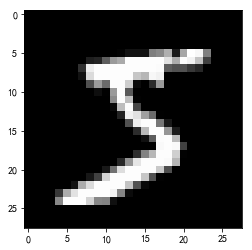

In [62]:
#以图片形式展现
import matplotlib.pyplot as plt

plt.imshow(train_images[0],cmap = plt.get_cmap('gray'))
plt.show()

In [33]:
train_labels[0]

5

### 2.2 数据预处理

#### 对样本数据进行归一化处理、整理输入张量形状

In [34]:
#对输入数据进行向量化和归一化处理
#输入shape转换为(图片张数、长度，宽度，通道数)
preprocessed_train_images = train_images.reshape((60000,28,28,1))
preprocessed_train_images = preprocessed_train_images.astype('float32')/255

In [35]:
preprocessed_test_images = test_images.reshape((10000,28,28,1))
preprocessed_test_images = preprocessed_test_images.astype('float32')/255

#### 对标签数据进行独热编码处理

In [36]:
#对输出进行one_hot处理
preprocessed_train_labels = to_categorical(train_labels)
preprocessed_test_labels = to_categorical(test_labels)

In [37]:
preprocessed_train_images.shape

(60000, 28, 28, 1)

In [38]:
preprocessed_train_labels.shape

(60000, 10)

In [39]:
preprocessed_test_labels[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

## 3 训练数据

### 3.1 基准模型训练

In [40]:
import time

start = time.time()

his_cnn_maxpool = network_cnn_maxpool.fit(preprocessed_train_images, preprocessed_train_labels, epochs = 20,batch_size = 64)

end = time.time()
train_time_network_cnn_maxpool = end - start
print('running time : %d s'%(end - start))

Epoch 1/20
938/938 [==============================] - 36s 38ms/step - loss: 0.1622 - accuracy: 0.9501
Epoch 2/20
938/938 [==============================] - 36s 38ms/step - loss: 0.0484 - accuracy: 0.9848
Epoch 3/20
938/938 [==============================] - 35s 37ms/step - loss: 0.0353 - accuracy: 0.9893
Epoch 4/20
938/938 [==============================] - 36s 38ms/step - loss: 0.0263 - accuracy: 0.9918
Epoch 5/20
938/938 [==============================] - 35s 37ms/step - loss: 0.0210 - accuracy: 0.9937
Epoch 6/20
938/938 [==============================] - 35s 37ms/step - loss: 0.0170 - accuracy: 0.9950
Epoch 7/20
938/938 [==============================] - 35s 37ms/step - loss: 0.0140 - accuracy: 0.9959
Epoch 8/20
938/938 [==============================] - 35s 38ms/step - loss: 0.0111 - accuracy: 0.9966
Epoch 9/20
938/938 [==============================] - 35s 37ms/step - loss: 0.0095 - accuracy: 0.9973
Epoch 10/20
938/938 [==============================] - 35s 38ms/step - loss: 0.007

#### 保存训练好的模型

In [41]:
network_cnn_maxpool.save('D:/2-AI读书学习笔记/0-python深度学习/0-model_repo/ch5_1_network_cnn_maxpool.h5')

#### 保存训练历史结果

In [42]:
#保存模型训练历史记录
import pickle
 
with open('D:/2-AI读书学习笔记/0-python深度学习/0-model_repo/ch5_1_network_cnn_maxpool_trainHistoryDict.txt', 'wb') as file_pi:
    pickle.dump(his_cnn_maxpool.history, file_pi)#将训练历史数据保存到指定文件中

### 3.2 对照模型1训练

In [43]:
import time

start = time.time()

his_mlp = network_mlp.fit(preprocessed_train_images, preprocessed_train_labels, epochs = 20,batch_size = 64)


end = time.time()
train_time_network_mlp = end - start
print('running time : %d s'%(end - start))

Epoch 1/20
938/938 [==============================] - 2s 2ms/step - loss: 0.3288 - accuracy: 0.9084
Epoch 2/20
938/938 [==============================] - 2s 2ms/step - loss: 0.1703 - accuracy: 0.9503
Epoch 3/20
938/938 [==============================] - 2s 2ms/step - loss: 0.1277 - accuracy: 0.9625
Epoch 4/20
938/938 [==============================] - 2s 2ms/step - loss: 0.1038 - accuracy: 0.9690
Epoch 5/20
938/938 [==============================] - 2s 2ms/step - loss: 0.0884 - accuracy: 0.9739
Epoch 6/20
938/938 [==============================] - 2s 2ms/step - loss: 0.0773 - accuracy: 0.9778
Epoch 7/20
938/938 [==============================] - 2s 2ms/step - loss: 0.0687 - accuracy: 0.9800
Epoch 8/20
938/938 [==============================] - 2s 2ms/step - loss: 0.0615 - accuracy: 0.9819
Epoch 9/20
938/938 [==============================] - 2s 2ms/step - loss: 0.0560 - accuracy: 0.9839
Epoch 10/20
938/938 [==============================] - 2s 2ms/step - loss: 0.0508 - accuracy: 0.9857

In [44]:
network_mlp.save('D:/2-AI读书学习笔记/0-python深度学习/0-model_repo/ch5_1_network_mlp.h5')

#保存模型训练历史记录
import pickle
 
with open('D:/2-AI读书学习笔记/0-python深度学习/0-model_repo/ch5_1_network_mlp_trainHistoryDict.txt', 'wb') as file_pi:
    pickle.dump(his_mlp.history, file_pi)#将训练历史数据保存到指定文件中

### 3.3 对照模型2训练

In [40]:
import time

start = time.time()

his_cnn_globalmaxpool = network_cnn_globalmaxpool.fit(preprocessed_train_images, preprocessed_train_labels, epochs = 20,batch_size = 64)

end = time.time()
train_time_network_cnn_globalmaxpool = end - start
print('running time : %d s'%(end - start))

Epoch 1/20
938/938 [==============================] - 18s 19ms/step - loss: 0.6370 - accuracy: 0.8153
Epoch 2/20
938/938 [==============================] - 22s 24ms/step - loss: 0.1954 - accuracy: 0.9389
Epoch 3/20
938/938 [==============================] - 22s 23ms/step - loss: 0.1419 - accuracy: 0.9548
Epoch 4/20
938/938 [==============================] - 22s 23ms/step - loss: 0.1135 - accuracy: 0.9638
Epoch 5/20
938/938 [==============================] - 22s 24ms/step - loss: 0.0946 - accuracy: 0.9698
Epoch 6/20
938/938 [==============================] - 22s 24ms/step - loss: 0.0809 - accuracy: 0.9742
Epoch 7/20
938/938 [==============================] - 22s 23ms/step - loss: 0.0722 - accuracy: 0.9770
Epoch 8/20
938/938 [==============================] - 23s 24ms/step - loss: 0.0643 - accuracy: 0.9796
Epoch 9/20
938/938 [==============================] - 22s 23ms/step - loss: 0.0580 - accuracy: 0.9821
Epoch 10/20
938/938 [==============================] - 22s 23ms/step - loss: 0.053

In [46]:
network_cnn_globalmaxpool.save('D:/2-AI读书学习笔记/0-python深度学习/0-model_repo/ch5_1_network_cnn_globalmaxpool.h5')

#保存模型训练历史记录
import pickle
 
with open('D:/2-AI读书学习笔记/0-python深度学习/0-model_repo/ch5_1_network_cnn_globalmaxpool_trainHistoryDict.txt', 'wb') as file_pi:
    pickle.dump(his_cnn_globalmaxpool.history, file_pi)#将训练历史数据保存到指定文件中

### 3.4 对照模型3训练

In [47]:
import time

start = time.time()

his_cnn_avgpool = network_cnn_avgpool.fit(preprocessed_train_images, preprocessed_train_labels, epochs = 20,batch_size = 64)

end = time.time()
train_time_network_cnn_avgpool = end - start
print('running time : %d s'%(end - start))

Epoch 1/20
938/938 [==============================] - 35s 37ms/step - loss: 0.2161 - accuracy: 0.9360
Epoch 2/20
938/938 [==============================] - 35s 37ms/step - loss: 0.0660 - accuracy: 0.9804
Epoch 3/20
938/938 [==============================] - 35s 37ms/step - loss: 0.0465 - accuracy: 0.9860
Epoch 4/20
938/938 [==============================] - 35s 37ms/step - loss: 0.0357 - accuracy: 0.9893
Epoch 5/20
938/938 [==============================] - 35s 37ms/step - loss: 0.0301 - accuracy: 0.9908
Epoch 6/20
938/938 [==============================] - 34s 37ms/step - loss: 0.0258 - accuracy: 0.9919
Epoch 7/20
938/938 [==============================] - 35s 38ms/step - loss: 0.0218 - accuracy: 0.9931
Epoch 8/20
938/938 [==============================] - 35s 37ms/step - loss: 0.0193 - accuracy: 0.9941
Epoch 9/20
938/938 [==============================] - 35s 38ms/step - loss: 0.0162 - accuracy: 0.9952
Epoch 10/20
938/938 [==============================] - 35s 38ms/step - loss: 0.015

In [48]:
network_cnn_avgpool.save('D:/2-AI读书学习笔记/0-python深度学习/0-model_repo/ch5_1_network_cnn_avgpool.h5')

#保存模型训练历史记录
import pickle
 
with open('D:/2-AI读书学习笔记/0-python深度学习/0-model_repo/ch5_1_network_cnn_avgpool_trainHistoryDict.txt', 'wb') as file_pi:
    pickle.dump(his_cnn_avgpool.history, file_pi)#将训练历史数据保存到指定文件中

### 3.5 对照模型4训练

In [49]:
import time

start = time.time()

his_cnn_globalavgpool = network_cnn_globalavgpool.fit(preprocessed_train_images, preprocessed_train_labels, epochs = 20,batch_size = 64)

end = time.time()
train_time_network_cnn_globalavgpool = end - start
print('running time : %d s'%(end - start))

Epoch 1/20
938/938 [==============================] - 34s 36ms/step - loss: 1.4588 - accuracy: 0.4976
Epoch 2/20
938/938 [==============================] - 34s 36ms/step - loss: 0.7282 - accuracy: 0.7756
Epoch 3/20
938/938 [==============================] - 34s 36ms/step - loss: 0.5124 - accuracy: 0.8433
Epoch 4/20
938/938 [==============================] - 34s 36ms/step - loss: 0.4029 - accuracy: 0.8760
Epoch 5/20
938/938 [==============================] - 34s 36ms/step - loss: 0.3390 - accuracy: 0.8957
Epoch 6/20
938/938 [==============================] - 34s 36ms/step - loss: 0.2942 - accuracy: 0.9096
Epoch 7/20
938/938 [==============================] - 34s 36ms/step - loss: 0.2605 - accuracy: 0.9198
Epoch 8/20
938/938 [==============================] - 34s 36ms/step - loss: 0.2357 - accuracy: 0.9274
Epoch 9/20
938/938 [==============================] - 34s 36ms/step - loss: 0.2143 - accuracy: 0.9345
Epoch 10/20
938/938 [==============================] - 34s 36ms/step - loss: 0.195

In [50]:
network_cnn_globalavgpool.save('D:/2-AI读书学习笔记/0-python深度学习/0-model_repo/ch5_1_network_cnn_globalavgpool.h5')

#保存模型训练历史记录
import pickle
 
with open('D:/2-AI读书学习笔记/0-python深度学习/0-model_repo/ch5_1_network_cnn_globalavgpool_trainHistoryDict.txt', 'wb') as file_pi:
    pickle.dump(his_cnn_globalavgpool.history, file_pi)#将训练历史数据保存到指定文件中

### 3.6 对照模型5训练

In [51]:
import time

start = time.time()

his_cnn_strid2 = network_cnn_strid2.fit(preprocessed_train_images, preprocessed_train_labels, epochs = 20,batch_size = 64)

end = time.time()
train_time_network_cnn_strid2 = end - start
print('running time : %d s'%(end - start))

Epoch 1/20
938/938 [==============================] - 9s 10ms/step - loss: 0.4799 - accuracy: 0.8590
Epoch 2/20
938/938 [==============================] - 9s 10ms/step - loss: 0.1763 - accuracy: 0.9464
Epoch 3/20
938/938 [==============================] - 9s 10ms/step - loss: 0.1310 - accuracy: 0.9592
Epoch 4/20
938/938 [==============================] - 9s 10ms/step - loss: 0.1066 - accuracy: 0.9669
Epoch 5/20
938/938 [==============================] - 9s 10ms/step - loss: 0.0892 - accuracy: 0.9725
Epoch 6/20
938/938 [==============================] - 9s 10ms/step - loss: 0.0783 - accuracy: 0.9755
Epoch 7/20
938/938 [==============================] - 9s 10ms/step - loss: 0.0684 - accuracy: 0.9784
Epoch 8/20
938/938 [==============================] - 9s 10ms/step - loss: 0.0603 - accuracy: 0.9813
Epoch 9/20
938/938 [==============================] - 9s 10ms/step - loss: 0.0555 - accuracy: 0.9827
Epoch 10/20
938/938 [==============================] - 9s 10ms/step - loss: 0.0497 - accura

In [52]:
network_cnn_strid2.save('D:/2-AI读书学习笔记/0-python深度学习/0-model_repo/ch5_1_network_cnn_strid2.h5')

#保存模型训练历史记录
import pickle
 
with open('D:/2-AI读书学习笔记/0-python深度学习/0-model_repo/ch5_1_network_cnn_strid2_trainHistoryDict.txt', 'wb') as file_pi:
    pickle.dump(his_cnn_strid2.history, file_pi)#将训练历史数据保存到指定文件中

### 3.7 对照模型6训练

In [53]:
import time

start = time.time()

his_cnn_deeper = network_cnn_deeper.fit(preprocessed_train_images, preprocessed_train_labels, epochs = 20,batch_size = 64)

end = time.time()
train_time_network_cnn_deeper = end - start
print('running time : %d s'%(end - start))

Epoch 1/20
938/938 [==============================] - 99s 105ms/step - loss: 0.1543 - accuracy: 0.9516
Epoch 2/20
938/938 [==============================] - 98s 104ms/step - loss: 0.0447 - accuracy: 0.9865
Epoch 3/20
938/938 [==============================] - 98s 104ms/step - loss: 0.0327 - accuracy: 0.9898
Epoch 4/20
938/938 [==============================] - 97s 104ms/step - loss: 0.0256 - accuracy: 0.9926
Epoch 5/20
938/938 [==============================] - 99s 105ms/step - loss: 0.0202 - accuracy: 0.9939
Epoch 6/20
938/938 [==============================] - 98s 104ms/step - loss: 0.0174 - accuracy: 0.9947
Epoch 7/20
938/938 [==============================] - 99s 105ms/step - loss: 0.0144 - accuracy: 0.9955
Epoch 8/20
938/938 [==============================] - 99s 105ms/step - loss: 0.0129 - accuracy: 0.9960
Epoch 9/20
938/938 [==============================] - 97s 103ms/step - loss: 0.0114 - accuracy: 0.9969
Epoch 10/20
938/938 [==============================] - 98s 104ms/step - l

In [54]:
network_cnn_deeper.save('D:/2-AI读书学习笔记/0-python深度学习/0-model_repo/ch5_1_network_cnn_deeper.h5')

#保存模型训练历史记录
import pickle
 
with open('D:/2-AI读书学习笔记/0-python深度学习/0-model_repo/ch5_1_network_cnn_deeper_trainHistoryDict.txt', 'wb') as file_pi:
    pickle.dump(his_cnn_deeper.history, file_pi)#将训练历史数据保存到指定文件中

### 3.8 对照模型7训练

In [55]:
import time

start = time.time()

his_cnn_nopool = network_cnn_nopool.fit(preprocessed_train_images, preprocessed_train_labels, epochs = 20,batch_size = 64)

end = time.time()
train_time_network_cnn_nopool = end - start
print('running time : %d s'%(end - start))

Epoch 1/20
938/938 [==============================] - 82s 87ms/step - loss: 0.1278 - accuracy: 0.9608
Epoch 2/20
938/938 [==============================] - 69s 73ms/step - loss: 0.0394 - accuracy: 0.9884
Epoch 3/20
938/938 [==============================] - 68s 73ms/step - loss: 0.0247 - accuracy: 0.9926
Epoch 4/20
938/938 [==============================] - 68s 73ms/step - loss: 0.0163 - accuracy: 0.9952
Epoch 5/20
938/938 [==============================] - 70s 74ms/step - loss: 0.0109 - accuracy: 0.9969
Epoch 6/20
938/938 [==============================] - 73s 78ms/step - loss: 0.0077 - accuracy: 0.9978
Epoch 7/20
938/938 [==============================] - 69s 73ms/step - loss: 0.0050 - accuracy: 0.9987
Epoch 8/20
938/938 [==============================] - 73s 78ms/step - loss: 0.0035 - accuracy: 0.9990
Epoch 9/20
938/938 [==============================] - 73s 78ms/step - loss: 0.0026 - accuracy: 0.9994
Epoch 10/20
938/938 [==============================] - 76s 81ms/step - loss: 0.001

In [56]:
network_cnn_nopool.save('D:/2-AI读书学习笔记/0-python深度学习/0-model_repo/ch5_1_network_cnn_nopool.h5')

#保存模型训练历史记录
import pickle
 
with open('D:/2-AI读书学习笔记/0-python深度学习/0-model_repo/ch5_1_network_cnn_nopool_trainHistoryDict.txt', 'wb') as file_pi:
    pickle.dump(his_cnn_nopool.history, file_pi)#将训练历史数据保存到指定文件中

### 3.9 对照模型8训练

In [57]:
import time

start = time.time()

his_cnn_padded = network_cnn_padded.fit(preprocessed_train_images, preprocessed_train_labels, epochs = 20,batch_size = 64)

end = time.time()
train_time_network_cnn_padded = end - start
print('running time : %d s'%(end - start))

Epoch 1/20
938/938 [==============================] - 31s 33ms/step - loss: 0.1593 - accuracy: 0.9505
Epoch 2/20
938/938 [==============================] - 31s 33ms/step - loss: 0.0474 - accuracy: 0.9856
Epoch 3/20
938/938 [==============================] - 32s 34ms/step - loss: 0.0322 - accuracy: 0.9901
Epoch 4/20
938/938 [==============================] - 32s 34ms/step - loss: 0.0246 - accuracy: 0.9920
Epoch 5/20
938/938 [==============================] - 31s 33ms/step - loss: 0.0198 - accuracy: 0.9940
Epoch 6/20
938/938 [==============================] - 31s 33ms/step - loss: 0.0154 - accuracy: 0.9952
Epoch 7/20
938/938 [==============================] - 31s 33ms/step - loss: 0.0127 - accuracy: 0.9962
Epoch 8/20
938/938 [==============================] - 31s 33ms/step - loss: 0.0095 - accuracy: 0.9971
Epoch 9/20
938/938 [==============================] - 32s 34ms/step - loss: 0.0076 - accuracy: 0.9979
Epoch 10/20
938/938 [==============================] - 32s 34ms/step - loss: 0.006

In [58]:
network_cnn_padded.save('D:/2-AI读书学习笔记/0-python深度学习/0-model_repo/ch5_1_network_cnn_padded.h5')

#保存模型训练历史记录
import pickle
 
with open('D:/2-AI读书学习笔记/0-python深度学习/0-model_repo/ch5_1_network_cnn_padded_trainHistoryDict.txt', 'wb') as file_pi:
    pickle.dump(his_cnn_padded.history, file_pi)#将训练历史数据保存到指定文件中

## 4 评估模型

### 4.1 评估测试集表现

In [55]:
#加载已经训练好的模型
from keras.models import load_model

network_cnn_maxpool = load_model('D:/2-AI读书学习笔记/0-python深度学习/0-model_repo/ch5_1_network_cnn_maxpool.h5')
network_mlp = load_model('D:/2-AI读书学习笔记/0-python深度学习/0-model_repo/ch5_1_network_mlp.h5')
network_cnn_globalmaxpool = load_model('D:/2-AI读书学习笔记/0-python深度学习/0-model_repo/ch5_1_network_cnn_globalmaxpool.h5')
network_cnn_avgpool = load_model('D:/2-AI读书学习笔记/0-python深度学习/0-model_repo/ch5_1_network_cnn_avgpool.h5')
network_cnn_globalavgpool = load_model('D:/2-AI读书学习笔记/0-python深度学习/0-model_repo/ch5_1_network_cnn_globalavgpool.h5')
network_cnn_strid2 = load_model('D:/2-AI读书学习笔记/0-python深度学习/0-model_repo/ch5_1_network_cnn_strid2.h5')
network_cnn_deeper = load_model('D:/2-AI读书学习笔记/0-python深度学习/0-model_repo/ch5_1_network_cnn_deeper.h5')
network_cnn_nopool = load_model('D:/2-AI读书学习笔记/0-python深度学习/0-model_repo/ch5_1_network_cnn_nopool.h5')
network_cnn_padded = load_model('D:/2-AI读书学习笔记/0-python深度学习/0-model_repo/ch5_1_network_cnn_padded.h5')

In [60]:
#基准模型
test_loss_cnn_maxpool, test_acc_cnn_maxpool = network_cnn_maxpool.evaluate(preprocessed_test_images, preprocessed_test_labels)
#对照模型1
test_loss_mlp, test_acc_mlp = network_mlp.evaluate(preprocessed_test_images, preprocessed_test_labels)
#对照模型2
test_loss_cnn_globalmaxpool, test_acc_cnn_globalmaxpool = network_cnn_globalmaxpool.evaluate(preprocessed_test_images, preprocessed_test_labels)
#对照模型3
test_loss_cnn_avgpool, test_acc_cnn_avgpool = network_cnn_avgpool.evaluate(preprocessed_test_images, preprocessed_test_labels)
#对照模型4
test_loss_cnn_globalavgpool, test_acc_cnn_globalavgpool = network_cnn_globalavgpool.evaluate(preprocessed_test_images, preprocessed_test_labels)
#对照模型5
test_loss_cnn_strid2, test_acc_cnn_strid2 = network_cnn_strid2.evaluate(preprocessed_test_images, preprocessed_test_labels)
#对照模型6
test_loss_cnn_deeper, test_acc_cnn_deeper = network_cnn_deeper.evaluate(preprocessed_test_images, preprocessed_test_labels)
#对照模型7
test_loss_cnn_nopool, test_acc_cnn_nopool = network_cnn_nopool.evaluate(preprocessed_test_images, preprocessed_test_labels)
#对照模型8
test_loss_cnn_padded, test_acc_cnn_padded = network_cnn_padded.evaluate(preprocessed_test_images, preprocessed_test_labels)


313/313 [==============================] - 1s 4ms/step - loss: 0.0623 - accuracy: 0.9914


In [61]:
test_results = [('network_cnn_maxpool',test_acc_cnn_maxpool),
               ('network_mlp',test_acc_mlp),
               ('network_cnn_globalmaxpool',test_acc_cnn_globalmaxpool),
               ('network_cnn_avgpool',test_acc_cnn_avgpool),
               ('network_cnn_globalavgpool',test_acc_cnn_globalavgpool),
               ('network_cnn_strid2',test_acc_cnn_strid2),
               ('network_cnn_deeper',test_acc_cnn_deeper),
               ('network_cnn_nopool',test_acc_cnn_nopool),
               ('network_cnn_padded',test_acc_cnn_padded)
               ]

In [62]:
#对测试结果排序
sorted_test_results = sorted(test_results, key=lambda x:x[1], reverse=True)

In [63]:
models,results = zip(*sorted_test_results)

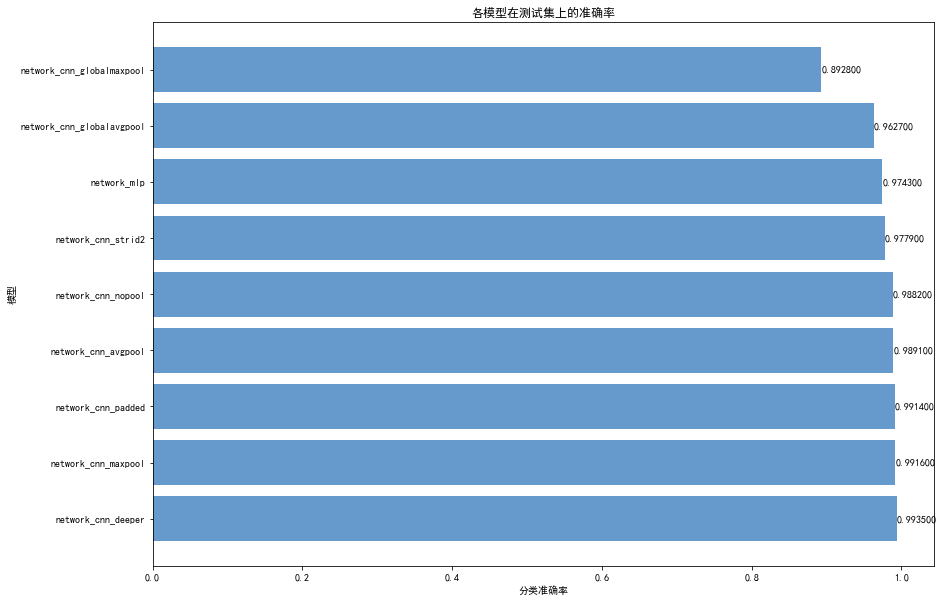

In [64]:
# plt.barh(models,results,align='center',height=0.5)
import matplotlib as mpl

mpl.rcParams['font.sans-serif'] = ['SimHei'] #为了图表中的汉字显示正常
mpl.rcParams['font.family']='sans-serif'

fig,ax=plt.subplots(figsize=(14,10))
b=ax.barh(models,results,color='#6699CC')  #绘制横向柱状图
ax.set_title('各模型在测试集上的准确率')  #设置图标题
ax.set_xlabel('分类准确率')
ax.set_ylabel('模型')
for rect in b: 
    w=rect.get_width()
    ax.text(w,rect.get_y()+rect.get_height()/2,'%f'%float(w),ha='left',va='center') #加数据标签
plt.show()

### 4.2 评估训练耗时

In [2]:
train_time = [('network_cnn_maxpool_traintime',706),
               ('network_mlp_traintime',43),
               ('network_cnn_globalmaxpool_traintime',538),
               ('network_cnn_avgpool_traintime',707),
               ('network_cnn_globalavgpool_traintime',675),
               ('network_cnn_strid2_traintime',181),
               ('network_cnn_deeper_traintime',1964),
               ('network_cnn_nopool_traintime',1452),
               ('network_cnn_padded_traintime',632)
               ]

In [4]:
sorted_train_time = sorted(train_time, key=lambda x:x[1], reverse=True)
models,time = zip(*sorted_train_time)

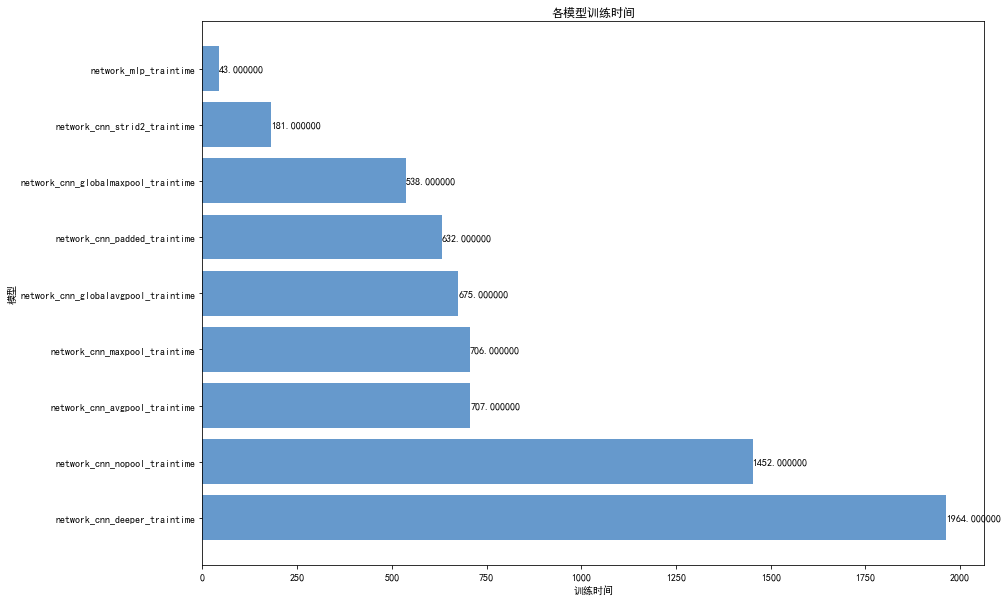

In [7]:
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rcParams['font.sans-serif'] = ['SimHei'] #为了图表中的汉字显示正常
mpl.rcParams['font.family']='sans-serif'

fig,ax=plt.subplots(figsize=(14,10))
b=ax.barh(models,time,color='#6699CC')  #绘制横向柱状图
ax.set_title('各模型训练时间')  #设置图标题
ax.set_xlabel('训练时间')
ax.set_ylabel('模型')
for rect in b: 
    w=rect.get_width()
    ax.text(w,rect.get_y()+rect.get_height()/2,'%f'%float(w),ha='left',va='center') #加数据标签
plt.show()

### 4.3 评估训练集表现

In [65]:
# dict_cnn_maxpool = his_cnn_maxpool.history
# dict_mlp = his_mlp.history
# dict_cnn_globalmaxpool = his_cnn_globalmaxpool.history
# dict_cnn_avgpool = his_cnn_avgpool.history
# dict_cnn_globalavgpool = his_cnn_globalavgpool.history
# dict_cnn_strid2 = his_cnn_strid2.history
# dict_cnn_deeper = his_cnn_deeper.history
# dict_cnn_nopool = his_cnn_nopool.history
# dict_cnn_padded = his_cnn_padded.history

In [1]:
#加载已经保存的训练历史记录
import pickle

with open('D:/2-AI读书学习笔记/0-python深度学习/0-model_repo/ch5_1_network_cnn_maxpool_trainHistoryDict.txt', 'rb') as file_pi:
    dict_cnn_maxpool = pickle.load(file_pi)
    
with open('D:/2-AI读书学习笔记/0-python深度学习/0-model_repo/ch5_1_network_mlp_trainHistoryDict.txt', 'rb') as file_pi:
    dict_mlp = pickle.load(file_pi)
    
with open('D:/2-AI读书学习笔记/0-python深度学习/0-model_repo/ch5_1_network_cnn_globalmaxpool_trainHistoryDict.txt', 'rb') as file_pi:
    dict_cnn_globalmaxpool  = pickle.load(file_pi)
    
with open('D:/2-AI读书学习笔记/0-python深度学习/0-model_repo/ch5_1_network_cnn_avgpool_trainHistoryDict.txt', 'rb') as file_pi:
    dict_cnn_avgpool  = pickle.load(file_pi)

with open('D:/2-AI读书学习笔记/0-python深度学习/0-model_repo/ch5_1_network_cnn_globalavgpool_trainHistoryDict.txt', 'rb') as file_pi:
    dict_cnn_globalavgpool  = pickle.load(file_pi)
    
with open('D:/2-AI读书学习笔记/0-python深度学习/0-model_repo/ch5_1_network_cnn_strid2_trainHistoryDict.txt', 'rb') as file_pi:
    dict_cnn_strid2  = pickle.load(file_pi)
    
with open('D:/2-AI读书学习笔记/0-python深度学习/0-model_repo/ch5_1_network_cnn_deeper_trainHistoryDict.txt', 'rb') as file_pi:
    dict_cnn_deeper  = pickle.load(file_pi)
    
with open('D:/2-AI读书学习笔记/0-python深度学习/0-model_repo/ch5_1_network_cnn_nopool_trainHistoryDict.txt', 'rb') as file_pi:
    dict_cnn_nopool  = pickle.load(file_pi)
    
with open('D:/2-AI读书学习笔记/0-python深度学习/0-model_repo/ch5_1_network_cnn_nopool_trainHistoryDict.txt', 'rb') as file_pi:
    dict_cnn_padded = pickle.load(file_pi)

In [9]:
max(dict_cnn_maxpool['accuracy'])

0.9994500279426575

In [10]:
max(dict_mlp['accuracy']) 

0.9937166571617126

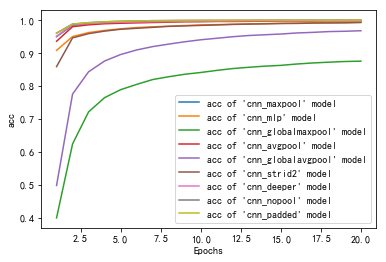

In [69]:
x = range(1,21)
plt.plot(x,dict_cnn_maxpool['accuracy'],label = 'acc of \'cnn_maxpool\' model')
plt.plot(x,dict_mlp['accuracy'],label = 'acc of \'cnn_mlp\' model')
plt.plot(x,dict_cnn_globalmaxpool['accuracy'],label = 'acc of \'cnn_globalmaxpool\' model')
plt.plot(x,dict_cnn_avgpool['accuracy'],label = 'acc of \'cnn_avgpool\' model')
plt.plot(x,dict_cnn_globalavgpool['accuracy'],label = 'acc of \'cnn_globalavgpool\' model')
plt.plot(x,dict_cnn_strid2['accuracy'],label = 'acc of \'cnn_strid2\' model')
plt.plot(x,dict_cnn_deeper['accuracy'],label = 'acc of \'cnn_deeper\' model')
plt.plot(x,dict_cnn_nopool['accuracy'],label = 'acc of \'cnn_nopool\' model')
plt.plot(x,dict_cnn_padded['accuracy'],label = 'acc of \'cnn_padded\' model')
plt.xlabel('Epochs')
plt.ylabel('acc')
plt.legend()
plt.show()

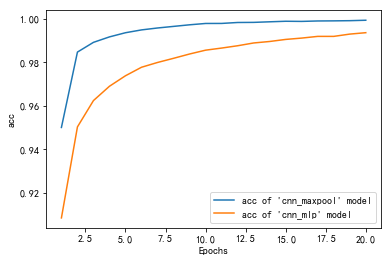

In [70]:
x = range(1,21)
plt.plot(x,dict_cnn_maxpool['accuracy'],label = 'acc of \'cnn_maxpool\' model')
plt.plot(x,dict_mlp['accuracy'],label = 'acc of \'cnn_mlp\' model')
plt.xlabel('Epochs')
plt.ylabel('acc')
plt.legend()
plt.show()

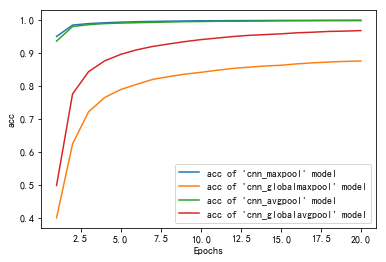

In [16]:
x = range(1,21)
plt.plot(x,dict_cnn_maxpool['accuracy'],label = 'acc of \'cnn_maxpool\' model')
plt.plot(x,dict_cnn_globalmaxpool['accuracy'],label = 'acc of \'cnn_globalmaxpool\' model')
plt.plot(x,dict_cnn_avgpool['accuracy'],label = 'acc of \'cnn_avgpool\' model')
plt.plot(x,dict_cnn_globalavgpool['accuracy'],label = 'acc of \'cnn_globalavgpool\' model')
plt.xlabel('Epochs')
plt.ylabel('acc')
plt.legend()
plt.show()

In [17]:
print(max(dict_cnn_maxpool['accuracy']))
print(max(dict_cnn_globalmaxpool['accuracy']))
print(max(dict_cnn_avgpool['accuracy']))
print(max(dict_cnn_globalavgpool['accuracy']))

0.9994500279426575
0.8756499886512756
0.9983999729156494
0.9680833220481873


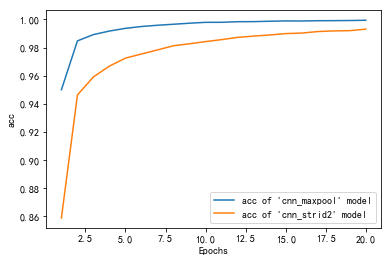

In [12]:
import matplotlib.pyplot as plt
x = range(1,21)
plt.plot(x,dict_cnn_maxpool['accuracy'],label = 'acc of \'cnn_maxpool\' model')
plt.plot(x,dict_cnn_strid2['accuracy'],label = 'acc of \'cnn_strid2\' model')
plt.xlabel('Epochs')
plt.ylabel('acc')
plt.legend()
plt.show()

In [13]:
max(dict_cnn_strid2['accuracy'])

0.9931166768074036

In [75]:
print(max(dict_cnn_maxpool['accuracy']))
print(max(dict_cnn_strid2['accuracy']))

0.9994500279426575
0.9931166768074036


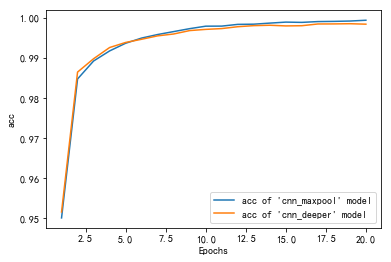

In [14]:
x = range(1,21)
plt.plot(x,dict_cnn_maxpool['accuracy'],label = 'acc of \'cnn_maxpool\' model')
plt.plot(x,dict_cnn_deeper['accuracy'],label = 'acc of \'cnn_deeper\' model')
plt.xlabel('Epochs')
plt.ylabel('acc')
plt.legend()
plt.show()

In [15]:
print(max(dict_cnn_maxpool['accuracy']))
print(max(dict_cnn_deeper['accuracy']))

0.9994500279426575
0.9985833168029785


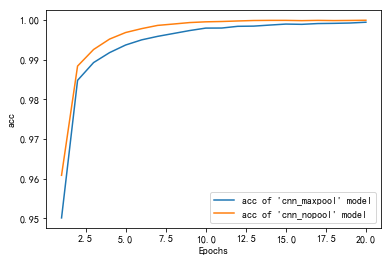

In [78]:
x = range(1,21)
plt.plot(x,dict_cnn_maxpool['accuracy'],label = 'acc of \'cnn_maxpool\' model')
plt.plot(x,dict_cnn_nopool['accuracy'],label = 'acc of \'cnn_nopool\' model')
plt.xlabel('Epochs')
plt.ylabel('acc')
plt.legend()
plt.show()

In [11]:
print(max(dict_cnn_maxpool['accuracy']))
print(max(dict_cnn_nopool['accuracy']))

0.9994500279426575
0.9999499917030334


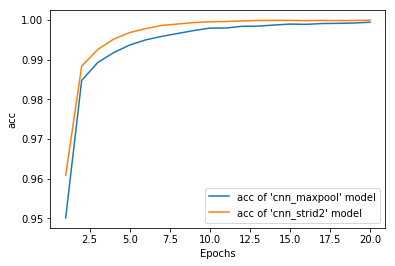

In [6]:
import matplotlib.pyplot as plt
x = range(1,21)
plt.plot(x,dict_cnn_maxpool['accuracy'],label = 'acc of \'cnn_maxpool\' model')
plt.plot(x,dict_cnn_padded['accuracy'],label = 'acc of \'cnn_strid2\' model')
plt.xlabel('Epochs')
plt.ylabel('acc')
plt.legend()
plt.show()

In [7]:
print(max(dict_cnn_padded['accuracy']))

0.9999499917030334


## 补充：观察卷积窗口对模型的影响

### 构建卷积窗口为（1,1）的模型

In [43]:
network_cnn_maxpool_conv1 = models.Sequential()
network_cnn_maxpool_conv1.add(layers.Conv2D(32,(1,1), activation = 'relu', input_shape = (28,28,1))) #输入：高度 x 宽度 x 颜色通道
network_cnn_maxpool_conv1.add(layers.MaxPooling2D((2,2)))
network_cnn_maxpool_conv1.add(layers.Conv2D(64,(1,1), activation = 'relu'))
network_cnn_maxpool_conv1.add(layers.MaxPooling2D((2,2)))

network_cnn_maxpool_conv1.add(layers.Flatten()) #将3D压缩为1D
network_cnn_maxpool_conv1.add(layers.Dense(64, activation = 'relu'))
network_cnn_maxpool_conv1.add(layers.Dense(10, activation = 'softmax'))

In [44]:
network_cnn_maxpool_conv1.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])
network_cnn_maxpool_conv1.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 28, 28, 32)        64        
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 14, 14, 64)        2112      
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dense_20 (Dense)             (None, 64)                200768    
_________________________________________________________________
dense_21 (Dense)             (None, 10)              

### 构建卷积窗口为（2,2）的模型

In [46]:
network_cnn_maxpool_conv2 = models.Sequential()
network_cnn_maxpool_conv2.add(layers.Conv2D(32,(2,2), activation = 'relu', input_shape = (28,28,1))) #输入：高度 x 宽度 x 颜色通道
network_cnn_maxpool_conv2.add(layers.MaxPooling2D((2,2)))
network_cnn_maxpool_conv2.add(layers.Conv2D(64,(2,2), activation = 'relu'))
network_cnn_maxpool_conv2.add(layers.MaxPooling2D((2,2)))

network_cnn_maxpool_conv2.add(layers.Flatten()) #将3D压缩为1D
network_cnn_maxpool_conv2.add(layers.Dense(64, activation = 'relu'))
network_cnn_maxpool_conv2.add(layers.Dense(10, activation = 'softmax'))

In [47]:
network_cnn_maxpool_conv2.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])
network_cnn_maxpool_conv2.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_23 (Conv2D)           (None, 27, 27, 32)        160       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 12, 12, 64)        8256      
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 6, 6, 64)          0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 2304)              0         
_________________________________________________________________
dense_22 (Dense)             (None, 64)                147520    
_________________________________________________________________
dense_23 (Dense)             (None, 10)              

### 构建卷积窗口为（4,4）的模型

In [48]:
network_cnn_maxpool_conv4 = models.Sequential()
network_cnn_maxpool_conv4.add(layers.Conv2D(32,(4,4), activation = 'relu', input_shape = (28,28,1))) #输入：高度 x 宽度 x 颜色通道
network_cnn_maxpool_conv4.add(layers.MaxPooling2D((2,2)))
network_cnn_maxpool_conv4.add(layers.Conv2D(64,(4,4), activation = 'relu'))
network_cnn_maxpool_conv4.add(layers.MaxPooling2D((2,2)))

network_cnn_maxpool_conv4.add(layers.Flatten()) #将3D压缩为1D
network_cnn_maxpool_conv4.add(layers.Dense(64, activation = 'relu'))
network_cnn_maxpool_conv4.add(layers.Dense(10, activation = 'softmax'))

In [49]:
network_cnn_maxpool_conv4.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])
network_cnn_maxpool_conv4.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_25 (Conv2D)           (None, 25, 25, 32)        544       
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 9, 9, 64)          32832     
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 4, 4, 64)          0         
_________________________________________________________________
flatten_10 (Flatten)         (None, 1024)              0         
_________________________________________________________________
dense_24 (Dense)             (None, 64)                65600     
_________________________________________________________________
dense_25 (Dense)             (None, 10)              

### 训练模型

In [51]:
his_cnn_maxpool_conv1 = network_cnn_maxpool_conv1.fit(preprocessed_train_images, preprocessed_train_labels, epochs = 20,batch_size = 64)
his_cnn_maxpool_conv2 = network_cnn_maxpool_conv2.fit(preprocessed_train_images, preprocessed_train_labels, epochs = 20,batch_size = 64)
his_cnn_maxpool_conv4 = network_cnn_maxpool_conv4.fit(preprocessed_train_images, preprocessed_train_labels, epochs = 20,batch_size = 64)

Epoch 1/20
938/938 [==============================] - 13s 14ms/step - loss: 0.5405 - accuracy: 0.8264
Epoch 2/20
938/938 [==============================] - 15s 16ms/step - loss: 0.3444 - accuracy: 0.8878
Epoch 3/20
938/938 [==============================] - 16s 18ms/step - loss: 0.2978 - accuracy: 0.9045
Epoch 4/20
938/938 [==============================] - 17s 18ms/step - loss: 0.2712 - accuracy: 0.9129
Epoch 5/20
938/938 [==============================] - 16s 17ms/step - loss: 0.2543 - accuracy: 0.9188
Epoch 6/20
938/938 [==============================] - 16s 17ms/step - loss: 0.2407 - accuracy: 0.9232
Epoch 7/20
938/938 [==============================] - 16s 17ms/step - loss: 0.2283 - accuracy: 0.9270
Epoch 8/20
938/938 [==============================] - 16s 17ms/step - loss: 0.2037 - accuracy: 0.9356
Epoch 9/20
938/938 [==============================] - 16s 17ms/step - loss: 0.1847 - accuracy: 0.9419
Epoch 10/20
938/938 [==============================] - 16s 17ms/step - loss: 0.174

### 保存模型及训练历史

In [54]:
network_cnn_maxpool_conv1.save('D:/2-AI读书学习笔记/0-python深度学习/0-model_repo/ch5_1_network_cnn_conv1.h5')
network_cnn_maxpool_conv2.save('D:/2-AI读书学习笔记/0-python深度学习/0-model_repo/ch5_1_network_cnn_conv2.h5')
network_cnn_maxpool_conv4.save('D:/2-AI读书学习笔记/0-python深度学习/0-model_repo/ch5_1_network_cnn_conv4.h5')

#保存模型训练历史记录
import pickle
 
with open('D:/2-AI读书学习笔记/0-python深度学习/0-model_repo/ch5_1_network_cnn_conv1_trainHistoryDict.txt', 'wb') as file_pi:
    pickle.dump(his_cnn_maxpool_conv1.history, file_pi)#将训练历史数据保存到指定文件中
    
with open('D:/2-AI读书学习笔记/0-python深度学习/0-model_repo/ch5_1_network_cnn_conv2_trainHistoryDict.txt', 'wb') as file_pi:
    pickle.dump(his_cnn_maxpool_conv2.history, file_pi)#将训练历史数据保存到指定文件中

with open('D:/2-AI读书学习笔记/0-python深度学习/0-model_repo/ch5_1_network_cnn_conv4_trainHistoryDict.txt', 'wb') as file_pi:
    pickle.dump(his_cnn_maxpool_conv4.history, file_pi)#将训练历史数据保存到指定文件中

In [56]:
#基准模型
test_loss_cnn_maxpool, test_acc_cnn_maxpool = network_cnn_maxpool.evaluate(preprocessed_test_images, preprocessed_test_labels)
test_loss_cnn_maxpool_conv1, test_acc_cnn_maxpool_conv1 = network_cnn_maxpool_conv1.evaluate(preprocessed_test_images, preprocessed_test_labels)
test_loss_cnn_maxpool_conv2, test_acc_cnn_maxpool_conv2 = network_cnn_maxpool_conv2.evaluate(preprocessed_test_images, preprocessed_test_labels)
test_loss_cnn_maxpool_conv4, test_acc_cnn_maxpool_conv4 = network_cnn_maxpool_conv4.evaluate(preprocessed_test_images, preprocessed_test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.0649 - accuracy: 0.9915


In [58]:
conv_test_results = [('network_cnn_maxpool',test_acc_cnn_maxpool),
               ('network_cnn_maxpool_conv1',test_acc_cnn_maxpool_conv1),
               ('network_cnn_maxpool_conv2',test_acc_cnn_maxpool_conv2),
               ('network_cnn_maxpool_conv4',test_acc_cnn_maxpool_conv4)
               ]

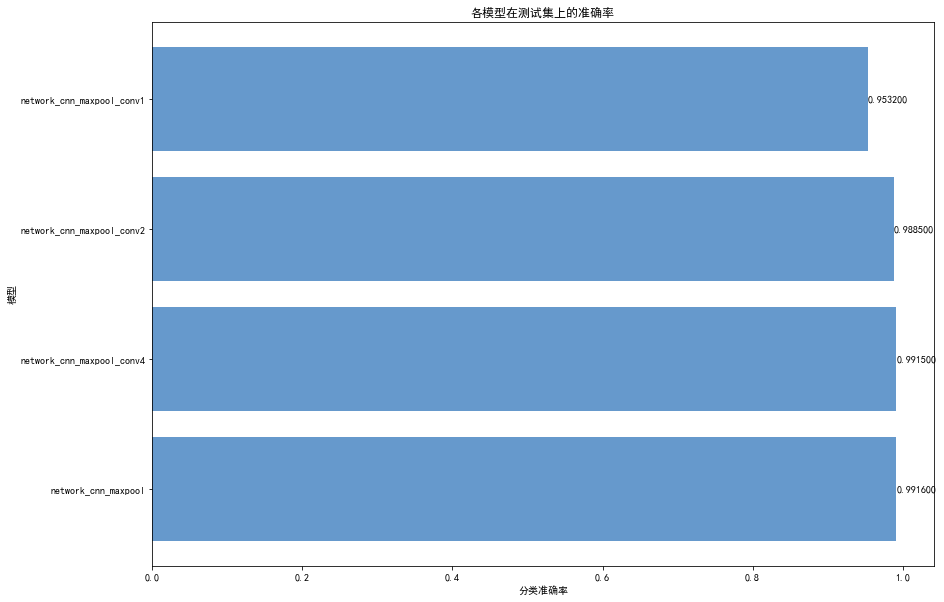

In [59]:
#对测试结果排序
sorted_test_results = sorted(conv_test_results, key=lambda x:x[1], reverse=True)

models,results = zip(*sorted_test_results)

# plt.barh(models,results,align='center',height=0.5)
import matplotlib as mpl

mpl.rcParams['font.sans-serif'] = ['SimHei'] #为了图表中的汉字显示正常
mpl.rcParams['font.family']='sans-serif'

fig,ax=plt.subplots(figsize=(14,10))
b=ax.barh(models,results,color='#6699CC')  #绘制横向柱状图
ax.set_title('各模型在测试集上的准确率')  #设置图标题
ax.set_xlabel('分类准确率')
ax.set_ylabel('模型')
for rect in b: 
    w=rect.get_width()
    ax.text(w,rect.get_y()+rect.get_height()/2,'%f'%float(w),ha='left',va='center') #加数据标签
plt.show()